# Figures, Axes, and Subplots

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
pokemon = pd.read_csv('data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


The base of visualization in matplotlib is a [Figure](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure) object. Contained within each Figure will be one or more [Axes](https://matplotlib.org/stable/api/axes_api.html) objects, each Axes object containing a number of other elements that represent each plot. In the earliest examples, these objects have been created implicitly. Let's say that the following expression is run inside a Jupyter notebook to create a histogram: `plt.hist(data=pokemon, x='speed');`\
Since we don't have a Figure area to plot inside, Python first creates a Figure object. And since the Figure doesn't start with any Axes to draw the histogram onto, an Axes object is created inside the Figure. Finally, the histogram is drawn within that Axes.

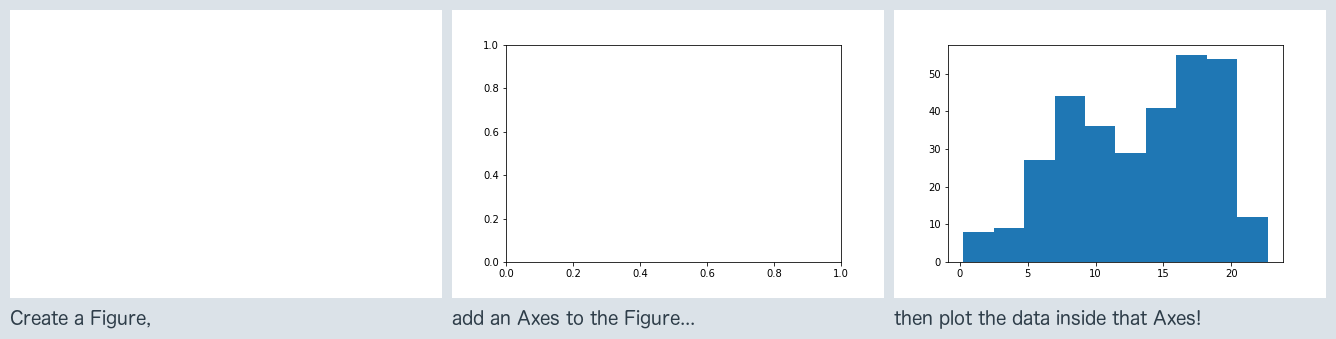

### Demonstrate `figure.add_axes()` and `axes.hist()`

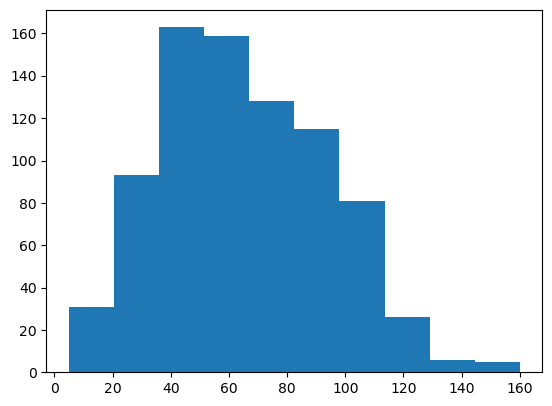

In [35]:
# create a new figure
fig = plt.figure()

# The argument of add_axes represents the dimensions [left, bottom, width, height] of the new axes. 
# All quantities are in fractions of figure width and height.
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data=pokemon, x='speed');

### Use axes with `seaborn.countplot()`

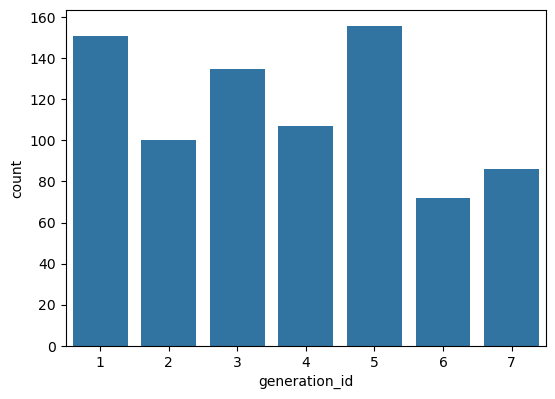

In [63]:
fig = plt.figure()
ax = fig.add_axes([.2, .2, .75, .7])  # [left, bottom, width, height]

base_color = sns.color_palette()[0]
sns.countplot(data=pokemon, x='generation_id', color=base_color, ax=ax);

### Sub-plots

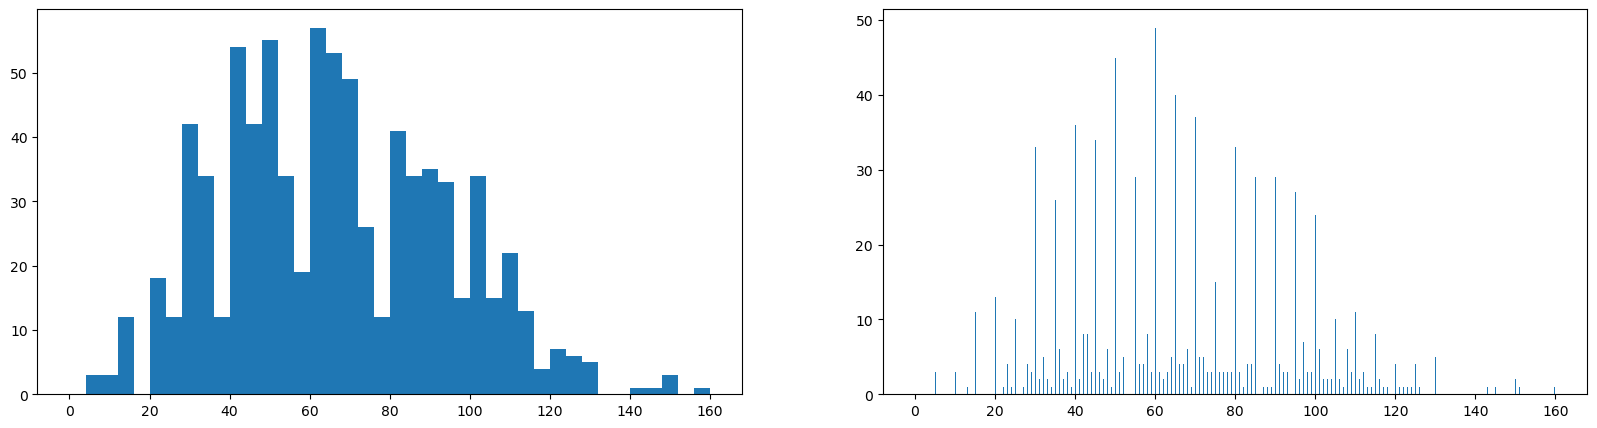

In [115]:
plt.figure(figsize=[20, 5])

plt.subplot(1, 2, 1)  # 1 row, 2 cols, subplot 1
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data=pokemon, x='speed', bins=bins);

plt.subplot(1, 2, 2)  # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data=pokemon, x='speed', bins=bins);

### Demonstrate `pyplot.sca()` and `pyplot.text()` to generate a grid of subplots

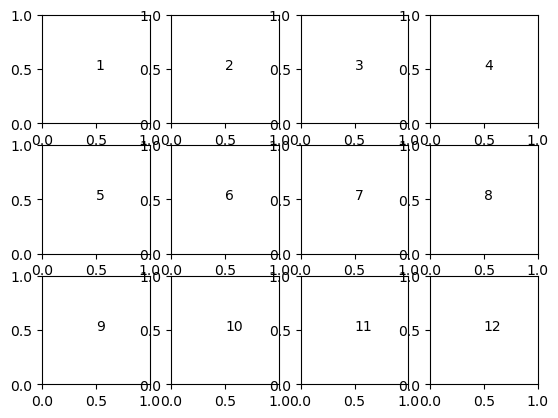

In [119]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes